<a href="https://colab.research.google.com/github/joaoVittorDevv/codenationChallenge/blob/master/data_science_challange_codenation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section
Set up

In [0]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from google.colab import files
import io
import pandas as pd


In [0]:
train, test = files.upload(), files.upload()


Saving estaticos_market.csv to estaticos_market.csv


In [0]:
df_train = pd.read_csv(io.BytesIO(train['train.csv']))
df_test = pd.read_csv(io.BytesIO(test['test.csv']))
df_insc = df_test['NU_INSCRICAO']

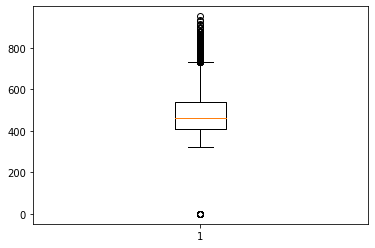

0        399.4
1        459.8
5        364.5
6        529.2
7        566.7
         ...  
13725    403.2
13726    452.4
13727    398.0
13728    386.6
13729    428.9
Name: NU_NOTA_MT, Length: 10133, dtype: float64


In [0]:
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt

df_train_ = df_train[~df_train['NU_NOTA_MT'].isin(['NaN'])]
# data_train = df_train_[['CO_UF_RESIDENCIA','SG_UF_RESIDENCIA','NU_IDADE','TP_SEXO','TP_COR_RACA','TP_NACIONALIDADE','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU',
#          'TP_ESCOLA','TP_ENSINO','IN_TREINEIRO','TP_DEPENDENCIA_ADM_ESC','IN_BAIXA_VISAO','IN_CEGUEIRA','IN_SURDEZ','IN_DISLEXIA',         'IN_DISCALCULIA','IN_SABATISTA','IN_GESTANTE','IN_IDOSO','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','CO_PROVA_CN','CO_PROVA_CH',
#          'CO_PROVA_LC','CO_PROVA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','TP_LINGUA','TP_STATUS_REDACAO','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3',
#          'NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO','Q001','Q002','Q006','Q024','Q025','Q026','Q027','Q047']]

data_train = df_train_[['CO_UF_RESIDENCIA','SG_UF_RESIDENCIA','NU_IDADE','TP_SEXO','TP_COR_RACA','TP_NACIONALIDADE','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU',
         'TP_ESCOLA','TP_ENSINO','IN_TREINEIRO','TP_DEPENDENCIA_ADM_ESC','IN_BAIXA_VISAO','IN_CEGUEIRA','IN_SURDEZ','IN_DISLEXIA',         'IN_DISCALCULIA','IN_SABATISTA','IN_GESTANTE','IN_IDOSO','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','CO_PROVA_CN','CO_PROVA_CH',
         'CO_PROVA_LC','CO_PROVA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','TP_LINGUA','TP_STATUS_REDACAO','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3',
         'NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO','Q001','Q002','Q006','Q024','Q025','Q026','Q027','Q047']]
answer_train = df_train_['NU_NOTA_MT']
data_train = pd.get_dummies(data_train)
# answer_train = pd.get_dummies(answer_train)

anstr = plt.boxplot(answer_train)

plt.show(anstr)
print(answer_train)
answer_train = answer_train.fillna(0)
data_train = data_train.fillna(0)

In [0]:

df_test_ = df_test[['CO_UF_RESIDENCIA','SG_UF_RESIDENCIA','NU_IDADE','TP_SEXO','TP_COR_RACA','TP_NACIONALIDADE','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU',
         'TP_ESCOLA','TP_ENSINO','IN_TREINEIRO','TP_DEPENDENCIA_ADM_ESC','IN_BAIXA_VISAO','IN_CEGUEIRA','IN_SURDEZ','IN_DISLEXIA',         'IN_DISCALCULIA','IN_SABATISTA','IN_GESTANTE','IN_IDOSO','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','CO_PROVA_CN','CO_PROVA_CH',
         'CO_PROVA_LC','CO_PROVA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','TP_LINGUA','TP_STATUS_REDACAO','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3',
         'NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO','Q001','Q002','Q006','Q024','Q025','Q026','Q027','Q047']]

x_test = pd.get_dummies(df_test_)

x_test = x_test.fillna(0)

In [0]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np

model = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])

print(len(data_train), len(answer_train))

model.fit(data_train, answer_train)


predicted = model.predict(x_test)

acertividade = model.score(data_train, answer_train)

print(model)
print(acertividade * 100)
print(predicted)



regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, data_train, answer_train, cv=10)


regressor.fit(data_train,answer_train)
score = regressor.score(data_train,answer_train)

predc = regressor.predict(x_test)

print(score * 100)
print(predc)

10133 10133
RidgeCV(alphas=array([0.001, 0.01 , 0.1  , 1.   ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)
45.58460103270484
[409.69116185 442.64449262 567.51556749 ... 640.01844443 448.96826384
 259.75307683]
100.0
[458.5 418.5 504.3 ... 669.9 534.2   0. ]


In [0]:

result_df = pd.DataFrame(data=predc)
print(df_test['NU_INSCRICAO'])
print(result_df)
df = pd.concat([df_test['NU_INSCRICAO'], result_df], axis=1)
df.to_csv('answer.csv')
files.download('answer.csv')



0       73ff9fcc02f0a99919906c942c2e1a1042cdcf98
1       71a95f9f1b91a82c65ad94abbdf9f54e6066f968
2       b38a03232f43b11c9d0788abaf060f7366053b6d
3       70b682d9a3636be23f6120fa9d6b164eb3c6002d
4       715494628a50142ce8cb17191cfe6d0f3cae0934
                          ...                   
4571    dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b
4572    a75fa8770257e7c9368d059fe53d9ef431f4bdef
4573    655fa6306720ff16e825903b5422a46608a77545
4574    1f4bc3e3d56212d500625bfe8ac78ccff4362293
4575    adf0d15b54317b6564ef56dad2b775bbb0ef50cc
Name: NU_INSCRICAO, Length: 4576, dtype: object
          0
0     458.5
1     418.5
2     504.3
3       0.0
4     446.2
...     ...
4571  383.0
4572  540.9
4573  669.9
4574  534.2
4575    0.0

[4576 rows x 1 columns]


MessageError: ignored